In [1]:
# importing modules and libraries

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Flatten, ELU, Dense, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Nadam

2024-06-06 19:38:18.573051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 19:38:18.573146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 19:38:18.681563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
from pathlib import Path
import imghdr

# Define the data directories
train_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"
test_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"

# Specific file types to be checked
image_extensions = [".png", ".jpg"]

# Allowed image types for TensorFlow
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

def check_images(directory, image_extensions, img_type_accepted_by_tf):
    for filepath in Path(directory).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

# Check images in train, validation, and test directories
print("Checking train directory...")
check_images(train_dir, image_extensions, img_type_accepted_by_tf)

print("\nChecking validation directory...")
check_images(val_dir, image_extensions, img_type_accepted_by_tf)

print("\nChecking test directory...")
check_images(test_dir, image_extensions, img_type_accepted_by_tf)

Checking train directory...
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0000505.jpg is not an image
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/leg-xray-showing-closed-spiral-260nw-1586443063.jpg is not an image
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/IMG0002511.jpg is not an image
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/IMG0002447.jpg is not an image
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/IMG0002445.jpg is not an image
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Bina

Found 9246 files belonging to 2 classes.


2024-06-06 11:44:19.463746: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454
2024-06-06 11:44:20.772495: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:24.677515: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:26.452550: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:30.338336: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454
2024-06-06 11:44:31.091652: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454


Found 829 files belonging to 2 classes.


2024-06-06 11:44:44.382562: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:44.914222: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:45.124031: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:47.511677: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454
2024-06-06 11:44:48.207115: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:48.896414: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454


Found 506 files belonging to 2 classes.


2024-06-06 11:44:53.463545: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454
2024-06-06 11:44:53.813677: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 414/454
2024-06-06 11:44:54.211960: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:55.396018: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:55.618537: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 11:44:56.260567: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/li

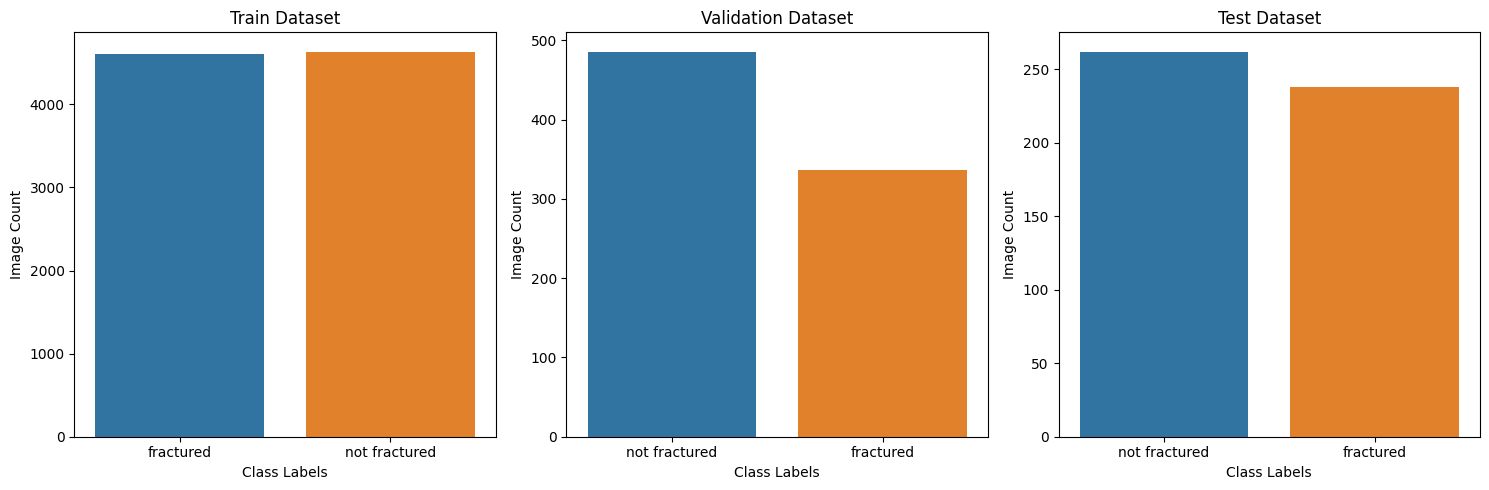

Train label counts:
fractured: 4606
not fractured: 4634

Validation label counts:
not fractured: 486
fractured: 337

Test label counts:
not fractured: 262
fractured: 238


In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        return True
    except:
        return False

# Function to load dataset and get label counts
def load_dataset_and_get_label_counts(directory_path, image_size=(64, 64), batch_size=32):
    dataset = keras.utils.image_dataset_from_directory(
        directory_path,
        image_size=image_size,
        batch_size=batch_size
    )
    valid_file_paths = []
    for file_path in dataset.file_paths:
        if is_valid_image(file_path):
            valid_file_paths.append(file_path)
    
    # Recreate the dataset with only valid images
    dataset = tf.data.Dataset.from_tensor_slices(valid_file_paths)
    dataset = dataset.map(lambda x: (tf.image.resize(tf.image.decode_jpeg(tf.io.read_file(x), channels=3), image_size), tf.strings.split(x, '/')[-2]))
    labels = []
    for image, label in dataset:
        labels.append(label.numpy())
    
    label_counts = Counter(labels)
    return dataset, label_counts

# Loading train dataset
train_dataset, train_label_counts = load_dataset_and_get_label_counts(
    "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
)

# Loading validation dataset
val_dataset, val_label_counts = load_dataset_and_get_label_counts(
    "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"
)

# Loading test dataset
test_dataset, test_label_counts = load_dataset_and_get_label_counts(
    "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
)

# Function to format label counts
def format_label_counts(label_counts):
    formatted_counts = {label.decode('utf-8'): count for label, count in label_counts.items()}
    return formatted_counts

# Formatting the label counts
formatted_train_counts = format_label_counts(train_label_counts)
formatted_val_counts = format_label_counts(val_label_counts)
formatted_test_counts = format_label_counts(test_label_counts)

# Plotting the counts
plt.figure(figsize=(15, 5))

# Train dataset
plt.subplot(1, 3, 1)
sns.barplot(x=list(formatted_train_counts.keys()), y=list(formatted_train_counts.values()))
plt.title('Train Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Image Count')

# Validation dataset
plt.subplot(1, 3, 2)
sns.barplot(x=list(formatted_val_counts.keys()), y=list(formatted_val_counts.values()))
plt.title('Validation Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Image Count')

# Test dataset
plt.subplot(1, 3, 3)
sns.barplot(x=list(formatted_test_counts.keys()), y=list(formatted_test_counts.values()))
plt.title('Test Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Image Count')

plt.tight_layout()
plt.show()

# Printing counts
print("Train label counts:")
for label, count in formatted_train_counts.items():
    print(f"{label}: {count}")

print("\nValidation label counts:")
for label, count in formatted_val_counts.items():
    print(f"{label}: {count}")

print("\nTest label counts:")
for label, count in formatted_test_counts.items():
    print(f"{label}: {count}")

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from tqdm import tqdm

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        return True
    except:
        return False

# Function to collect valid image file paths and their labels
def collect_valid_image_paths_and_labels(directory_path):
    valid_image_paths_and_labels = []
    for root, dirs, files in os.walk(directory_path):
        for file in tqdm(files):
            if file.lower().endswith(('.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                if is_valid_image(file_path):
                    label = os.path.basename(root)
                    valid_image_paths_and_labels.append((file_path, label))
    return valid_image_paths_and_labels

# Function to create a dataset from valid image paths and labels
def create_dataset_from_valid_paths_and_labels(image_paths_and_labels, image_size=(224, 224), batch_size=32):
    # Create dataset from image paths and labels
    image_paths, labels = zip(*image_paths_and_labels)
    dataset = tf.data.Dataset.from_tensor_slices((list(image_paths), list(labels)))
    
    # Load and preprocess images
    def load_and_preprocess_image(image_path, label):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = image / 255.0  # Normalize
        return image, label
    
    dataset = dataset.map(load_and_preprocess_image)
    
    # Create a lookup table for label encoding
    label_list = list(set(label for _, label in image_paths_and_labels))
    label_lookup = tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(label_list, tf.range(len(label_list))),
        default_value=-1
    )
    
    # Encode labels using the lookup table
    def encode_labels(image, label):
        label_index = label_lookup.lookup(label)
        return image, label_index
    
    dataset = dataset.map(encode_labels)
    
    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    return dataset, label_list

# Function to get images and labels from a dataset
def get_images_and_labels(dataset):
    images_list = []
    labels_list = []
    for images, labels in dataset:
        images_list.append(images.numpy())
        labels_list.append(labels.numpy())
    return np.concatenate(images_list), np.concatenate(labels_list)

# Paths to the directories
train_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"
test_dir = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"

# Collecting valid image paths and labels
train_image_paths_and_labels = collect_valid_image_paths_and_labels(train_dir)
val_image_paths_and_labels = collect_valid_image_paths_and_labels(val_dir)
test_image_paths_and_labels = collect_valid_image_paths_and_labels(test_dir)

# Creating datasets
train_dataset, label_list = create_dataset_from_valid_paths_and_labels(train_image_paths_and_labels)
val_dataset, _ = create_dataset_from_valid_paths_and_labels(val_image_paths_and_labels)
test_dataset, _ = create_dataset_from_valid_paths_and_labels(test_image_paths_and_labels)

# Getting images and labels
train_images, train_labels = get_images_and_labels(train_dataset)
val_images, val_labels = get_images_and_labels(val_dataset)
test_images, test_labels = get_images_and_labels(test_dataset)

# Printing the shapes and labels
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Label list:", label_list)

0it [00:00, ?it/s]
100%|██████████| 4606/4606 [00:20<00:00, 225.66it/s]
0it [00:00, ?it/s]
  0%|          | 0/492 [00:00<?, ?it/s]2024-06-06 19:39:14.618892: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 19:39:14.640485: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
100%|██████████| 337/337 [00:01<00:00, 177.05it/s]
0it [00:00, ?it/s]
  0%|          | 0/268 [00:00<?, ?it/s]2024-06-06 19:39:20.100118: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
2024-06-06 19:39:20.111391: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 446/454
100%|██████████| 238/238 [00:00<00:00, 310.41it/s]


Train images shape: (9165, 224, 224, 3)
Train labels shape: (9165,)
Validation images shape: (764, 224, 224, 3)
Validation labels shape: (764,)
Test images shape: (443, 224, 224, 3)
Test labels shape: (443,)
Label list: ['not fractured', 'fractured']


In [3]:
import gc # calling garbage collector to reduce memory allocation 

del train_dataset
del val_dataset
del test_dataset

gc.collect()

834

In [4]:
from keras import mixed_precision # changing precision policies
mixed_precision.set_global_policy('mixed_float16')

In [5]:
tf.config.optimizer.set_jit(True) # setting optimizer to reduce model computation by optimizing graph-computations

### VGG16

In [5]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

# Loading model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block4_pool').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_loss', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,161,601 (31.13 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20


2024-06-06 17:20:28.118048: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=3,k3=0} for conv (f16[250,112,112,128]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,112,112,128]{3,2,1,0}, f16[128,3,3,128]{3,2,1,0}, f16[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 17:20:28.387061: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.26915269s
Trying algorithm eng11{k2=3,k3=0} for conv (f16[250,112,112,128]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,112,112,128]{3,2,1,0}, f16[128,3,3,128]{3,2,1,0}, f16[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu

36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.5340 - loss: 1.1417

W0000 00:00:1717694596.300180     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5352 - loss: 1.1342   
Epoch 1: val_accuracy improved from -inf to 0.79581, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.5363 - loss: 1.1271 - val_accuracy: 0.7958 - val_loss: 0.5429 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7165 - loss: 0.5658
Epoch 2: val_accuracy did not improve from 0.79581
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.7170 - loss: 0.5652 - val_accuracy: 0.7592 - val_loss: 0.5313 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.7916 - loss: 0.4776
Epoch 3: val_accuracy did not improve from 0.79581
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.7916 - loss: 0.4774 - val_accuracy: 0.7343 - val_loss: 0.5218 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8216 - loss: 0.4265
Epoch 4: val_accuracy improved from 0.79581 to 0.84162, savi

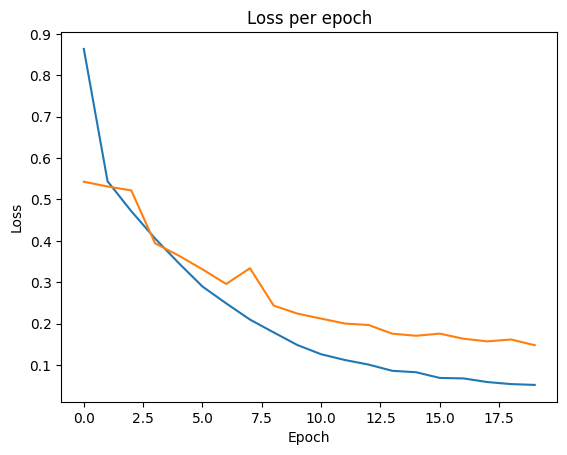

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

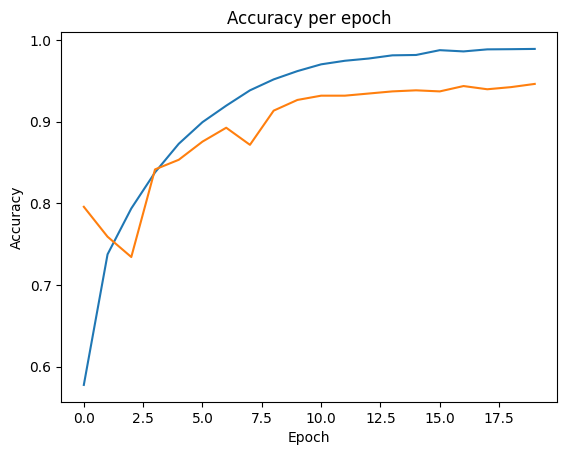

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [9]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9501 - loss: 0.1515
Test Loss: 0.11417270451784134
Test Accuracy: 0.9616252779960632


### ResNet50

In [5]:
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=resnet50_model.input, outputs=resnet50_model.get_layer('conv4_block3_out').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

# Setting callbacks
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

model.summary() # model summary

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 210,746,753 (803.94 MB)

 Trainable params: 205,522,945 (784.01 MB)

 Non-trainable params: 5,223,808 (19.93 MB)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20


I0000 00:00:1717695806.509454     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717695806.551925     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.4982 - loss: 7.3797

W0000 00:00:1717695835.000519     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717695839.463671     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.38743, saving model to model.keras


W0000 00:00:1717695845.491139     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4983 - loss: 7.3931 - val_accuracy: 0.3874 - val_loss: 9.8734 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4991 - loss: 8.0737
Epoch 2: val_accuracy did not improve from 0.38743
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.4990 - loss: 8.0744 - val_accuracy: 0.3874 - val_loss: 9.8734 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.4995 - loss: 8.0666
Epoch 3: val_accuracy did not improve from 0.38743
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.4995 - loss: 8.0675 - val_accuracy: 0.3874 - val_loss: 9.8734 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.4973 - loss: 8.1020
Epoch 4: val_accuracy did not improve from 0.38743
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.4973 - loss: 8.1020 - val_accuracy: 0.3874 - val_loss: 9.8734 - learning_rate: 0.0010
Epoch 5/20
37/37 ━━━━━━━━━━

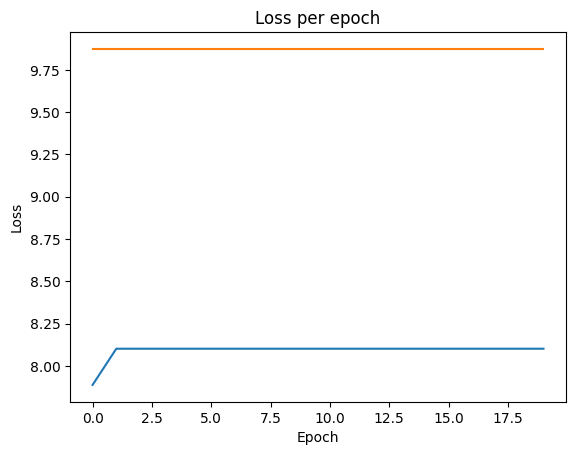

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

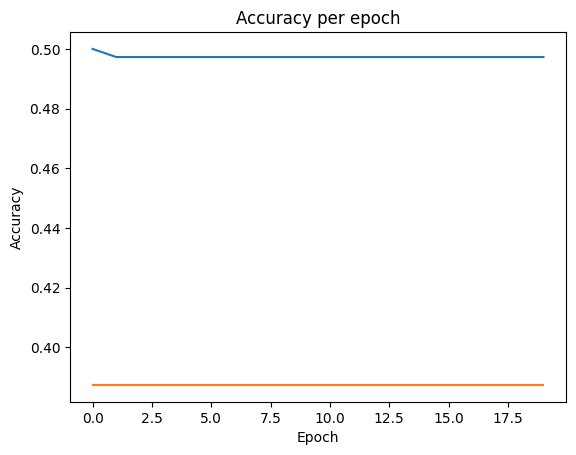

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [9]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

 5/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 16.1181

W0000 00:00:1717696100.721273     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 495ms/step - accuracy: 0.1614 - loss: 13.5172
Test Loss: 8.877686500549316
Test Accuracy: 0.44920992851257324


W0000 00:00:1717696107.153840     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


### DenseNet121

In [10]:
from keras.applications import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading model
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=densenet121_model.input, outputs=densenet121_model.get_layer('conv5_block6_concat').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False
    
# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

model.summary() # model summary

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 6,263,233 (23.89 MB)

 Trainable params: 722,945 (2.76 MB)

 Non-trainable params: 5,540,288 (21.13 MB)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20


W0000 00:00:1717696210.506478     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6642 - loss: 0.6293   

W0000 00:00:1717696264.544011     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717696274.190563     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.80366, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6654 - loss: 0.6281 - val_accuracy: 0.8037 - val_loss: 0.4606 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.7794 - loss: 0.4734
Epoch 2: val_accuracy improved from 0.80366 to 0.81937, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.7796 - loss: 0.4731 - val_accuracy: 0.8194 - val_loss: 0.4175 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8300 - loss: 0.3951
Epoch 3: val_accuracy improved from 0.81937 to 0.84817, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.8299 - loss: 0.3949 - val_accuracy: 0.8482 - val_loss: 0.3553 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8613 - loss: 0.3436
Epoch 4: val_accuracy improved from 0.84817 to 0.85079, saving model

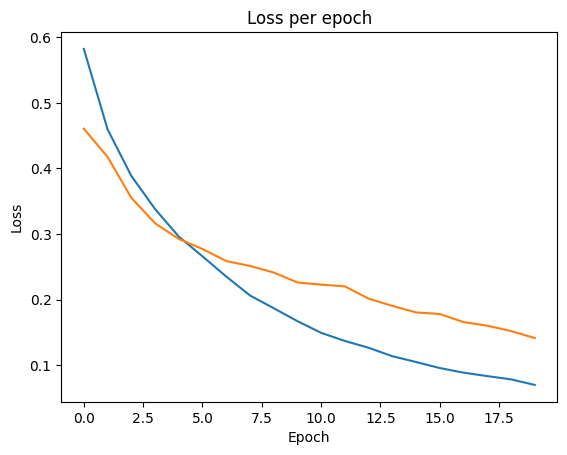

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

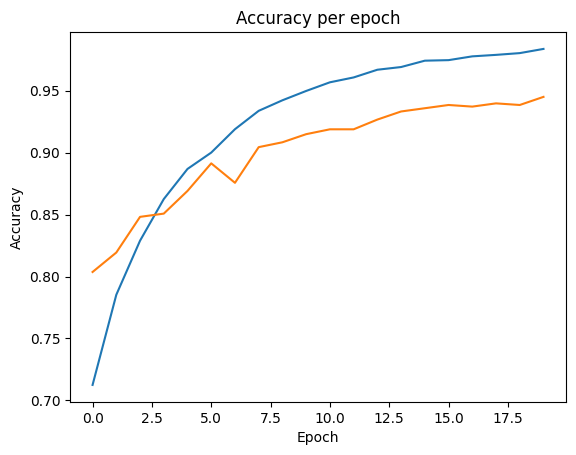

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [14]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9245 - loss: 0.1922
Test Loss: 0.1494087427854538
Test Accuracy: 0.95033860206604


### Xception

In [15]:
from keras.applications import Xception
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=xception_model.input, outputs=xception_model.get_layer('block14_sepconv2_act').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

model.summary() # model summary

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 22,960,681 (87.59 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20


2024-06-06 17:56:30.047520: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng28{k2=3,k3=0} for conv (f16[250,109,109,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,109,109,64]{3,2,1,0}, f16[64,3,3,1]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 17:56:30.234907: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.187502233s
Trying algorithm eng28{k2=3,k3=0} for conv (f16[250,109,109,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,109,109,64]{3,2,1,0}, f16[64,3,3,1]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is t

36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.6315 - loss: 0.8962

2024-06-06 17:57:44.059104: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng28{k2=3,k3=0} for conv (f16[165,109,109,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[165,109,109,64]{3,2,1,0}, f16[64,3,3,1]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 17:57:44.107357: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.048432425s
Trying algorithm eng28{k2=3,k3=0} for conv (f16[165,109,109,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[165,109,109,64]{3,2,1,0}, f16[64,3,3,1]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is t

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6339 - loss: 0.8890   

W0000 00:00:1717696703.616907     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717696708.300280     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.85995, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6361 - loss: 0.8822 - val_accuracy: 0.8599 - val_loss: 0.3705 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8693 - loss: 0.3136
Epoch 2: val_accuracy improved from 0.85995 to 0.91230, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 334ms/step - accuracy: 0.8700 - loss: 0.3125 - val_accuracy: 0.9123 - val_loss: 0.2280 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9520 - loss: 0.1653
Epoch 3: val_accuracy improved from 0.91230 to 0.93979, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - accuracy: 0.9522 - loss: 0.1648 - val_accuracy: 0.9398 - val_loss: 0.1775 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9730 - loss: 0.1031
Epoch 4: val_accuracy improved from 0.93979 to 0.95157, saving model

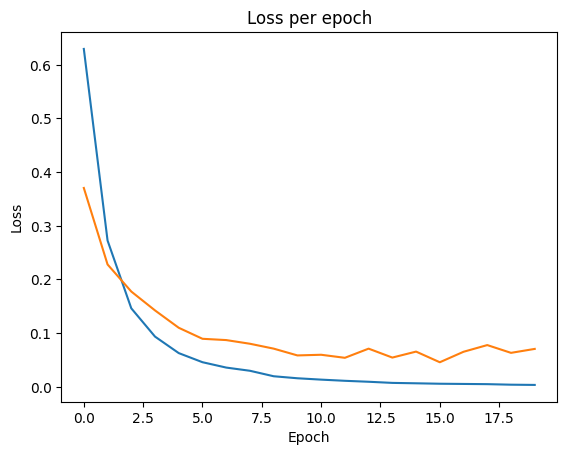

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

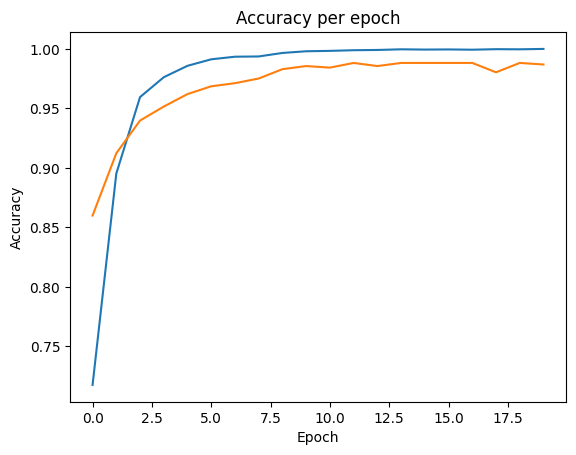

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [19]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 787ms/step - accuracy: 1.0000 - loss: 0.0244
Test Loss: 0.017047664150595665
Test Accuracy: 1.0


### Inception

In [20]:
from keras.applications import InceptionV3
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=inception_model.input, outputs=inception_model.get_layer('mixed10').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

model.summary() # model summary

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,901,985 (91.18 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
 1/37 ━━━━━━━━━━━━━━━━━━━━ 29:27 49s/step - accuracy: 0.4360 - loss: 0.9417

W0000 00:00:1717697108.467899     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5022 - loss: 7.0226   

W0000 00:00:1717697145.098045     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717697152.906089     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.61257, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5021 - loss: 7.0423 - val_accuracy: 0.6126 - val_loss: 6.1766 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5013 - loss: 7.9507
Epoch 2: val_accuracy did not improve from 0.61257
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.5013 - loss: 7.9501 - val_accuracy: 0.6126 - val_loss: 6.1766 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4990 - loss: 7.9874
Epoch 3: val_accuracy did not improve from 0.61257
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.4991 - loss: 7.9858 - val_accuracy: 0.6126 - val_loss: 6.1766 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5063 - loss: 7.8703
Epoch 4: val_accuracy did not improve from 0.61257
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.5062 - loss: 7.8719 - val_accu

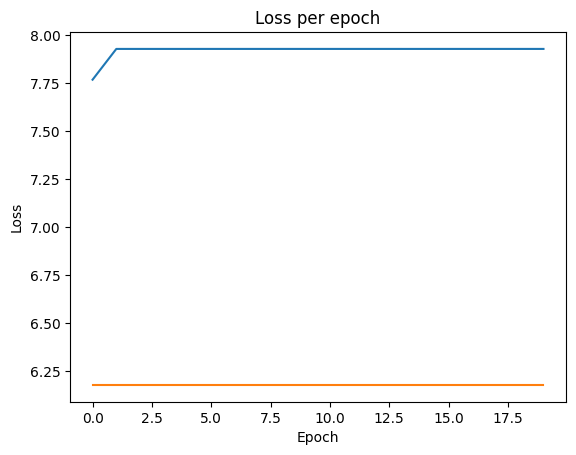

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

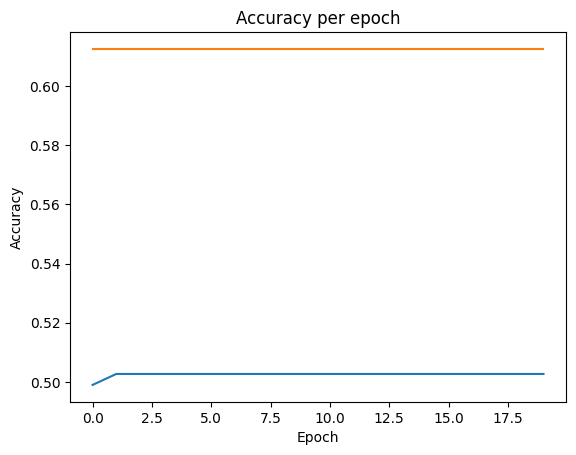

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [24]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8386 - loss: 2.5725  
Test Loss: 7.161477088928223
Test Accuracy: 0.5507900714874268


### MobileNet

In [25]:
from keras.applications import MobileNet
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading MobileNet model
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=mobilenet_model.input, outputs=mobilenet_model.get_layer('conv_pw_13_relu').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Binding model
model = Model(inputs=feature_extractor.input, outputs=output)

# Setting up callbacks
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

model.summary() # model summary


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,279,489 (16.32 MB)

 Trainable params: 1,050,625 (4.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size=250,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
 2/37 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.5090 - loss: 1.9705 

W0000 00:00:1717697431.395330     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.5546 - loss: 3.0810

W0000 00:00:1717697450.806287     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717697454.238346     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.83639, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 747ms/step - accuracy: 0.5569 - loss: 3.0477 - val_accuracy: 0.8364 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8649 - loss: 0.3278
Epoch 2: val_accuracy improved from 0.83639 to 0.90576, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8653 - loss: 0.3270 - val_accuracy: 0.9058 - val_loss: 0.2501 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9375 - loss: 0.1900
Epoch 3: val_accuracy improved from 0.90576 to 0.94634, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9378 - loss: 0.1894 - val_accuracy: 0.9463 - val_loss: 0.1701 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9770 - loss: 0.1019
Epoch 4: val_accuracy improved from 0.94634 to 0.95550, saving model

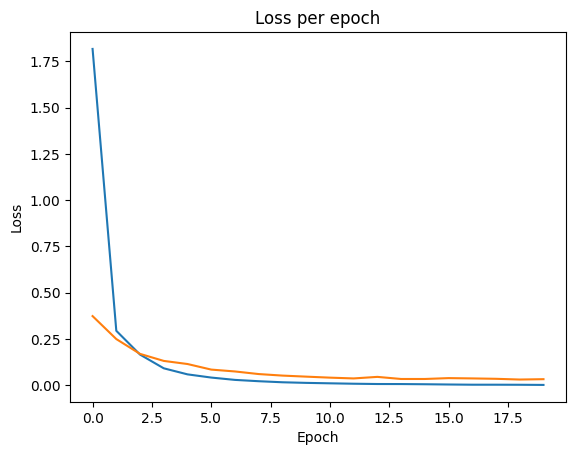

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

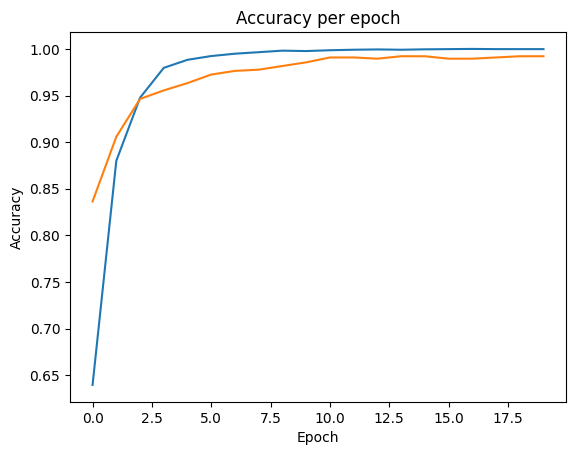

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [29]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 1.0000 - loss: 0.0230
Test Loss: 0.015572687610983849
Test Accuracy: 1.0


### CNN

In [6]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, InputLayer
from keras.regularizers import l1_l2

model = Sequential()

model.add(InputLayer(shape=(224, 224, 3))) # input layer

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(GlobalAveragePooling2D()) # pooling down

model.add(Dense(1024, activation='relu')) # dense layer

model.add(Dense(1, activation='sigmoid')) # output layer

model.summary() # model summary

# model checkpoint callback
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,921 (523.13 KB)

 Trainable params: 133,537 (521.63 KB)

 Non-trainable params: 384 (1.50 KB)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling and fitting model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=30, batch_size=100,callbacks=[model_checkpoint])

Epoch 1/30


I0000 00:00:1717702805.424781     543 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-06 19:40:22.028703: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f16[250,56,56,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,56,56,64]{3,2,1,0}, f16[64,3,3,32]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBackwardInput", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 19:40:22.684521: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.655919082s
Trying algorithm eng0{} for conv (f16[250,56,56,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[250,56,56,64]{3,2,1,0}, f16[64,3,3,32]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBackwardInput", backend_config={

36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.6986 - loss: 0.5592

2024-06-06 19:42:36.003929: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f16[165,56,56,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[165,56,56,64]{3,2,1,0}, f16[64,3,3,32]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBackwardInput", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 19:42:36.060798: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.056963792s
Trying algorithm eng0{} for conv (f16[165,56,56,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[165,56,56,64]{3,2,1,0}, f16[64,3,3,32]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convBackwardInput", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 19:42:37.425712: E external/local_

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7007 - loss: 0.5570   
Epoch 1: val_accuracy improved from -inf to 0.61649, saving model to model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7027 - loss: 0.5550 - val_accuracy: 0.6165 - val_loss: 0.6627
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8647 - loss: 0.3232
Epoch 2: val_accuracy did not improve from 0.61649
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.8651 - loss: 0.3223 - val_accuracy: 0.3874 - val_loss: 0.8143
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9478 - loss: 0.1691
Epoch 3: val_accuracy did not improve from 0.61649
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.9479 - loss: 0.1687 - val_accuracy: 0.3874 - val_loss: 1.0491
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9603 - loss: 0.1315
Epoch 4: val_accuracy did not improve from 0.61649
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.9605 - loss: 0.1311 - val_ac

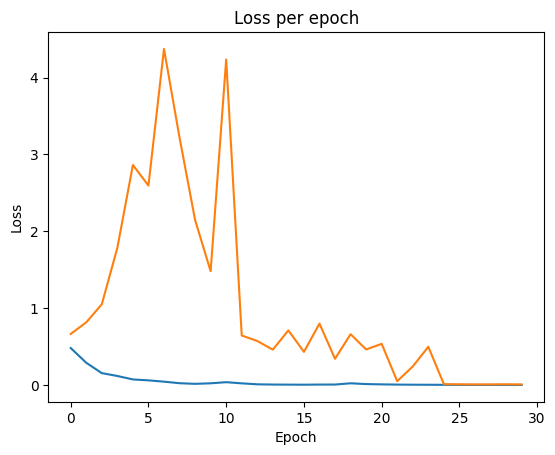

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

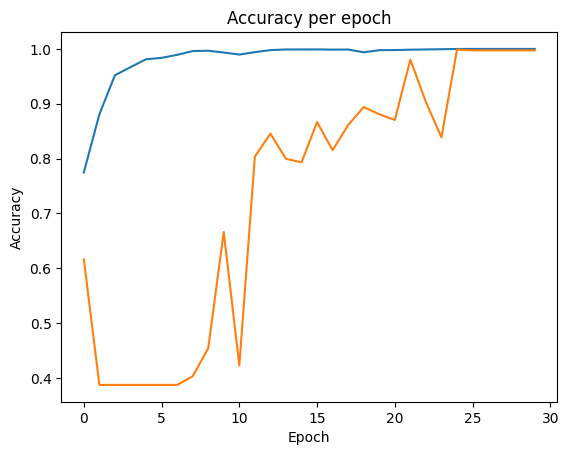

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [12]:
import keras
from keras.models import load_model

# Load the model from the file
model1 = load_model("model.keras")

# Evaluate the model on the test data
results = model1.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 1.0000 - loss: 0.0054
Test Loss: 0.0037182741798460484
Test Accuracy: 1.0
